<a href="https://colab.research.google.com/github/obeabi/SdsOctober2020Challenge/blob/main/Main_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #2 - Used Car Prices
## 2021-01-02

### In this example the catgeorical columns were all transformed using target encoding

This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Step 1: Data Preprocessing 

In [4]:
# Importing the libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import  zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [5]:
# Importing the training dataset

df_train = pd.read_csv('df_train_te.csv', engine= 'python', encoding= 'latin1')


df_train.head()

,Unnamed: 0,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd,manufacturer_name_te,model_name_te,transmission_te,color_te,engine_fuel_te,engine_type_te,body_type_te,state_te,drivetrain_te
0,0,245000,2006,0,1.6,0,1,0,0,0,0,0,0,0,0,0,7,4250.0,5029.863851,9575.330756,4470.104020,4786.850334,6270.954384,6222.792804,4038.937757,6460.257538,5373.827909
1,1,265542,2002,0,3.3,0,0,1,0,0,0,0,0,0,0,0,133,4000.0,5735.589271,3179.271449,10916.245249,5934.723934,6270.954384,6222.792804,6182.120881,6460.257538,5373.827909
2,2,168000,2009,0,1.8,0,0,0,0,1,0,0,1,1,1,1,0,10900.0,5029.863851,5543.469085,4470.104020,4786.850334,7433.666811,7432.738394,6182.120881,6460.257538,5373.827909
3,3,225522,2008,0,1.8,0,0,1,1,0,0,1,0,0,1,1,20,6999.0,4735.107530,8128.120448,4470.104020,5854.666404,6270.954384,6222.792804,4971.458897,6460.257538,5373.827909
4,4,370000,1991,0,1.8,0,0,0,0,0,0,0,0,0,0,1,160,1600.0,7121.501476,1643.286410,4470.104020,9160.871863,6270.954384,6222.792804,5788.889002,6460.257538,5373.827909


In [6]:
# drop first column
df_train.drop(['Unnamed: 0','duration_listed'], axis = 1, inplace = True)

df_train.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price_usd,manufacturer_name_te,model_name_te,transmission_te,color_te,engine_fuel_te,engine_type_te,body_type_te,state_te,drivetrain_te
0,245000,2006,0,1.6,0,1,0,0,0,0,0,0,0,0,0,4250.0,5029.863851,9575.330756,4470.104020,4786.850334,6270.954384,6222.792804,4038.937757,6460.257538,5373.827909
1,265542,2002,0,3.3,0,0,1,0,0,0,0,0,0,0,0,4000.0,5735.589271,3179.271449,10916.245249,5934.723934,6270.954384,6222.792804,6182.120881,6460.257538,5373.827909
2,168000,2009,0,1.8,0,0,0,0,1,0,0,1,1,1,1,10900.0,5029.863851,5543.469085,4470.104020,4786.850334,7433.666811,7432.738394,6182.120881,6460.257538,5373.827909
3,225522,2008,0,1.8,0,0,1,1,0,0,1,0,0,1,1,6999.0,4735.107530,8128.120448,4470.104020,5854.666404,6270.954384,6222.792804,4971.458897,6460.257538,5373.827909
4,370000,1991,0,1.8,0,0,0,0,0,0,0,0,0,0,1,1600.0,7121.501476,1643.286410,4470.104020,9160.871863,6270.954384,6222.792804,5788.889002,6460.257538,5373.827909


In [7]:
# print shape and check for missing values
print(df_train.shape)
print(df_train.isnull().sum().sum())

(30824, 25)
0


In [8]:
# Importing the test dataset

df_test = pd.read_csv('df_test_te.csv', engine= 'python', encoding= 'latin1')

df_test.head()

,Unnamed: 0,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_name_te,model_name_te,transmission_te,color_te,engine_fuel_te,engine_type_te,body_type_te,state_te,drivetrain_te
0,0,360000,1997,0,1.6,0,0,1,0,0,0,0,0,1,0,1,114,4527.444987,3579.201887,4470.10402,4786.850334,6270.954384,6222.792804,7279.898552,6460.257538,5373.827909
1,1,267000,1999,0,1.4,0,0,0,0,0,0,0,0,0,0,1,67,4366.573198,2982.466306,4470.10402,5934.723934,6270.954384,6222.792804,4038.937757,6460.257538,5373.827909
2,2,172000,2000,0,2.0,0,1,0,0,0,0,0,0,0,0,0,50,6422.908952,7369.254926,4470.10402,4786.850334,6270.954384,6222.792804,6182.120881,6460.257538,5373.827909
3,3,230000,2009,0,2.4,0,0,1,1,1,0,1,1,1,1,1,79,8321.328778,19373.482632,4470.10402,8388.715029,7433.666811,7432.738394,4971.458897,6460.257538,5373.827909
4,4,206000,2007,0,1.6,0,0,1,0,1,0,1,0,0,0,0,74,4735.107530,7140.549826,4470.10402,5934.723934,6270.954384,6222.792804,5788.889002,6460.257538,5373.827909


In [9]:
# drop first column
df_test.drop(['Unnamed: 0','duration_listed'], axis = 1, inplace = True)

df_test.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,manufacturer_name_te,model_name_te,transmission_te,color_te,engine_fuel_te,engine_type_te,body_type_te,state_te,drivetrain_te
0,360000,1997,0,1.6,0,0,1,0,0,0,0,0,1,0,1,4527.444987,3579.201887,4470.10402,4786.850334,6270.954384,6222.792804,7279.898552,6460.257538,5373.827909
1,267000,1999,0,1.4,0,0,0,0,0,0,0,0,0,0,1,4366.573198,2982.466306,4470.10402,5934.723934,6270.954384,6222.792804,4038.937757,6460.257538,5373.827909
2,172000,2000,0,2.0,0,1,0,0,0,0,0,0,0,0,0,6422.908952,7369.254926,4470.10402,4786.850334,6270.954384,6222.792804,6182.120881,6460.257538,5373.827909
3,230000,2009,0,2.4,0,0,1,1,1,0,1,1,1,1,1,8321.328778,19373.482632,4470.10402,8388.715029,7433.666811,7432.738394,4971.458897,6460.257538,5373.827909
4,206000,2007,0,1.6,0,0,1,0,1,0,1,0,0,0,0,4735.107530,7140.549826,4470.10402,5934.723934,6270.954384,6222.792804,5788.889002,6460.257538,5373.827909


In [10]:
# print shape and number of total missing values
print(df_test.shape)
print(df_test.isnull().sum().sum())

(7707, 24)
0


In [11]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## Building  first model with only numericals columns

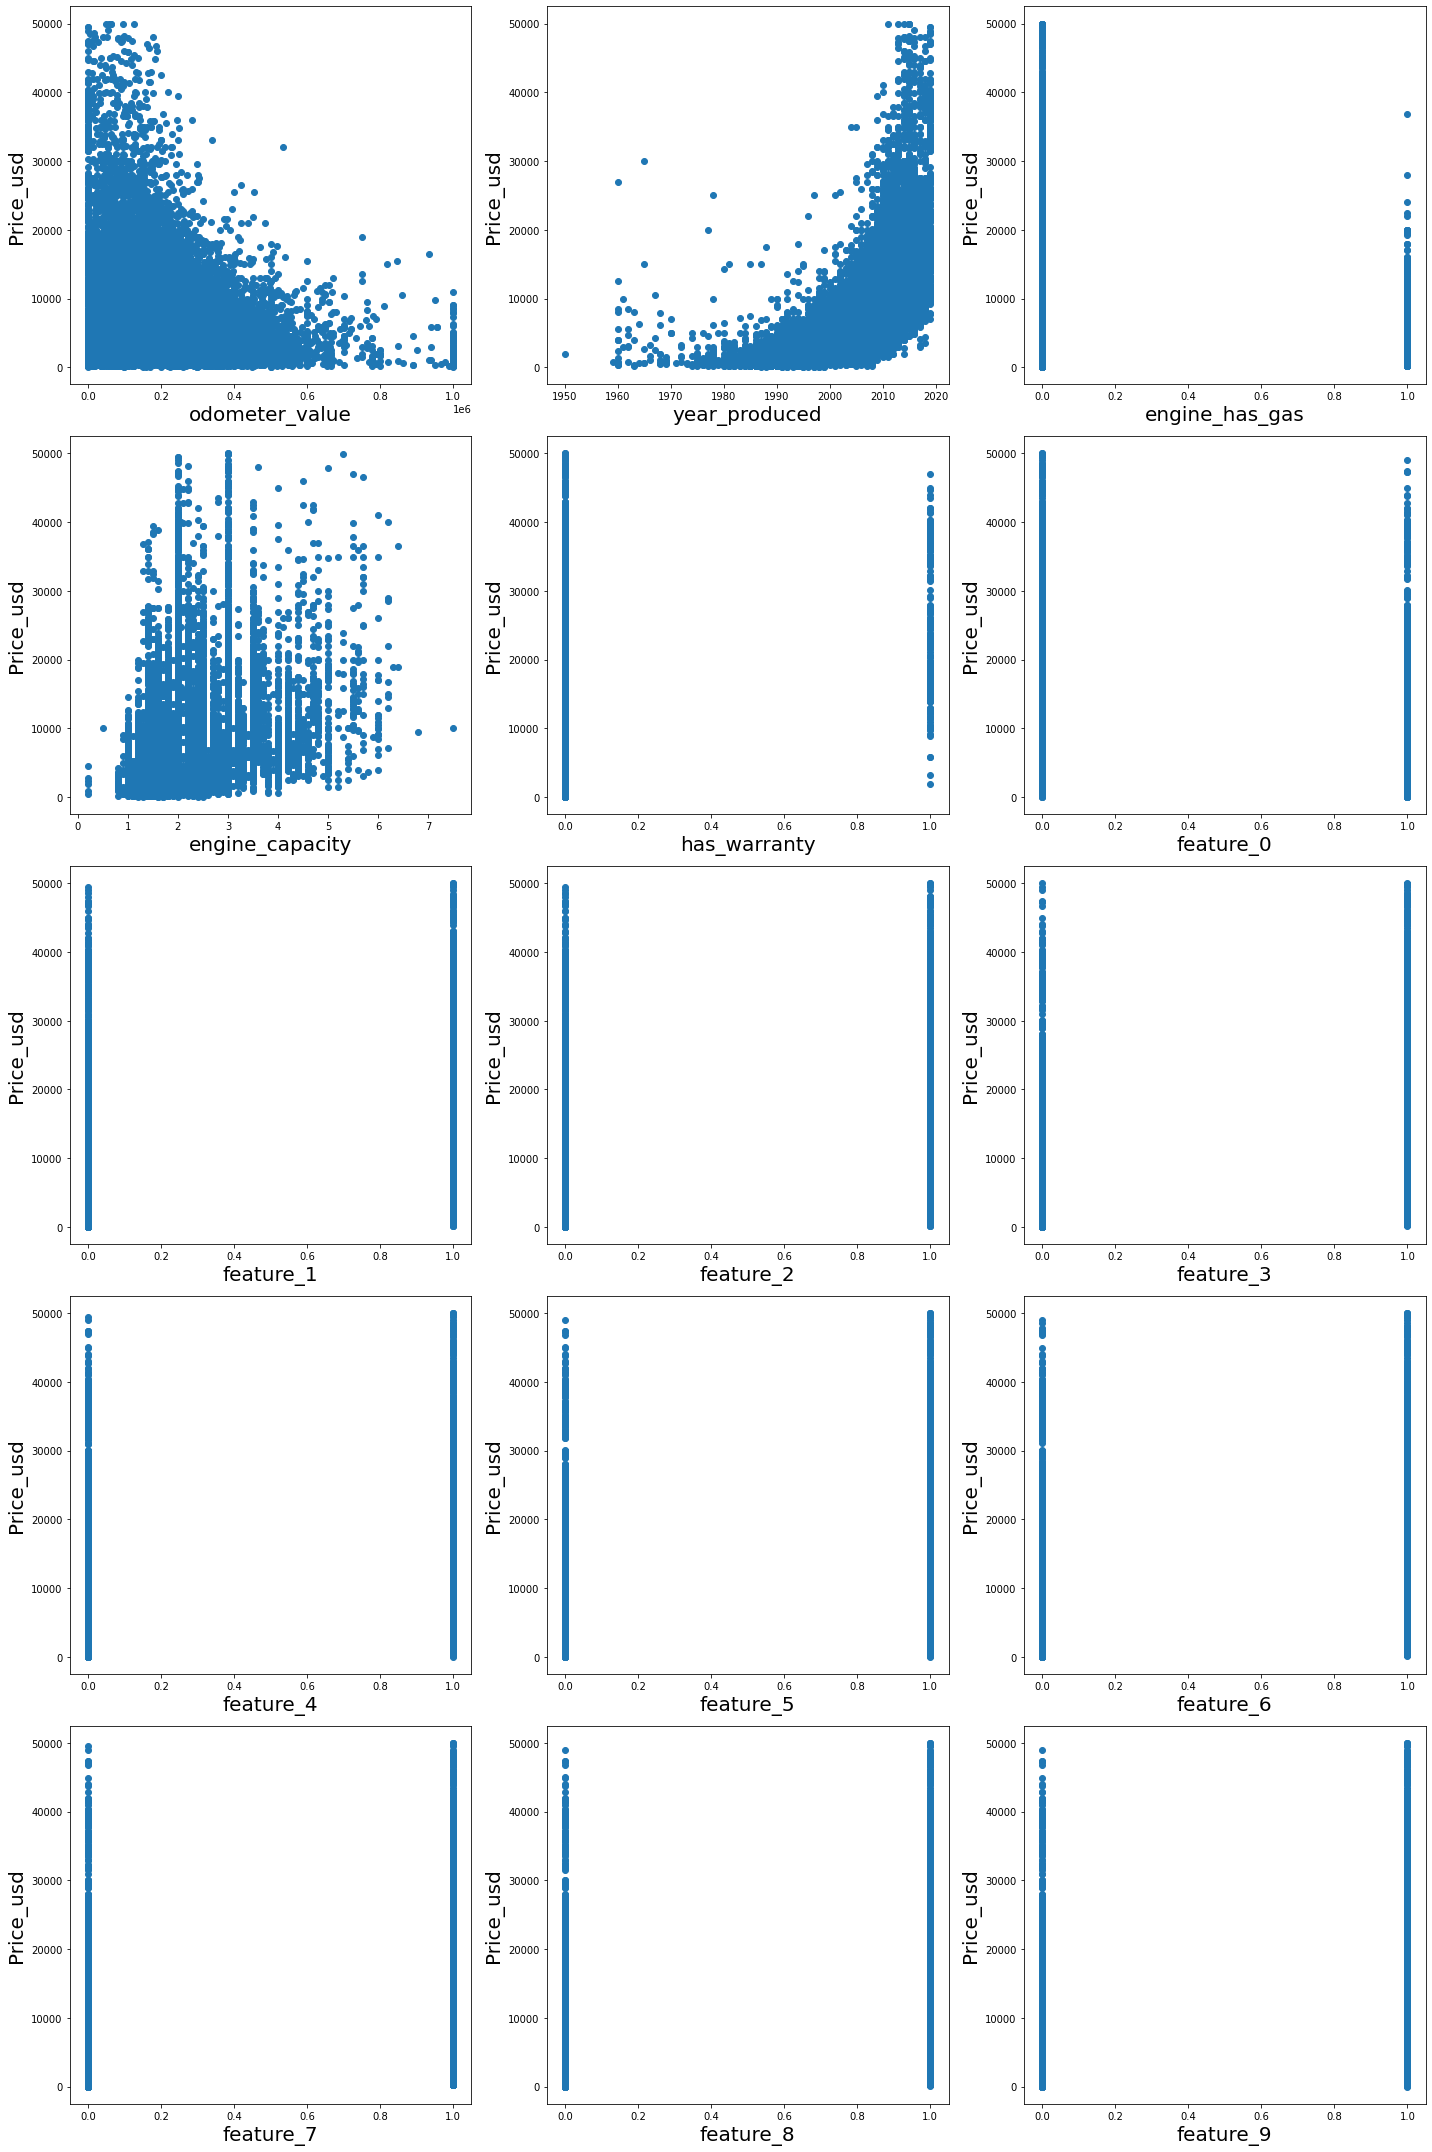

In [12]:
# Viusalize realtionship between indepednet and dependent variable
y = df_train['price_usd']
X = df_train.drop(columns = ['price_usd'])

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price_usd',fontsize=20)
    plotnumber+=1
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

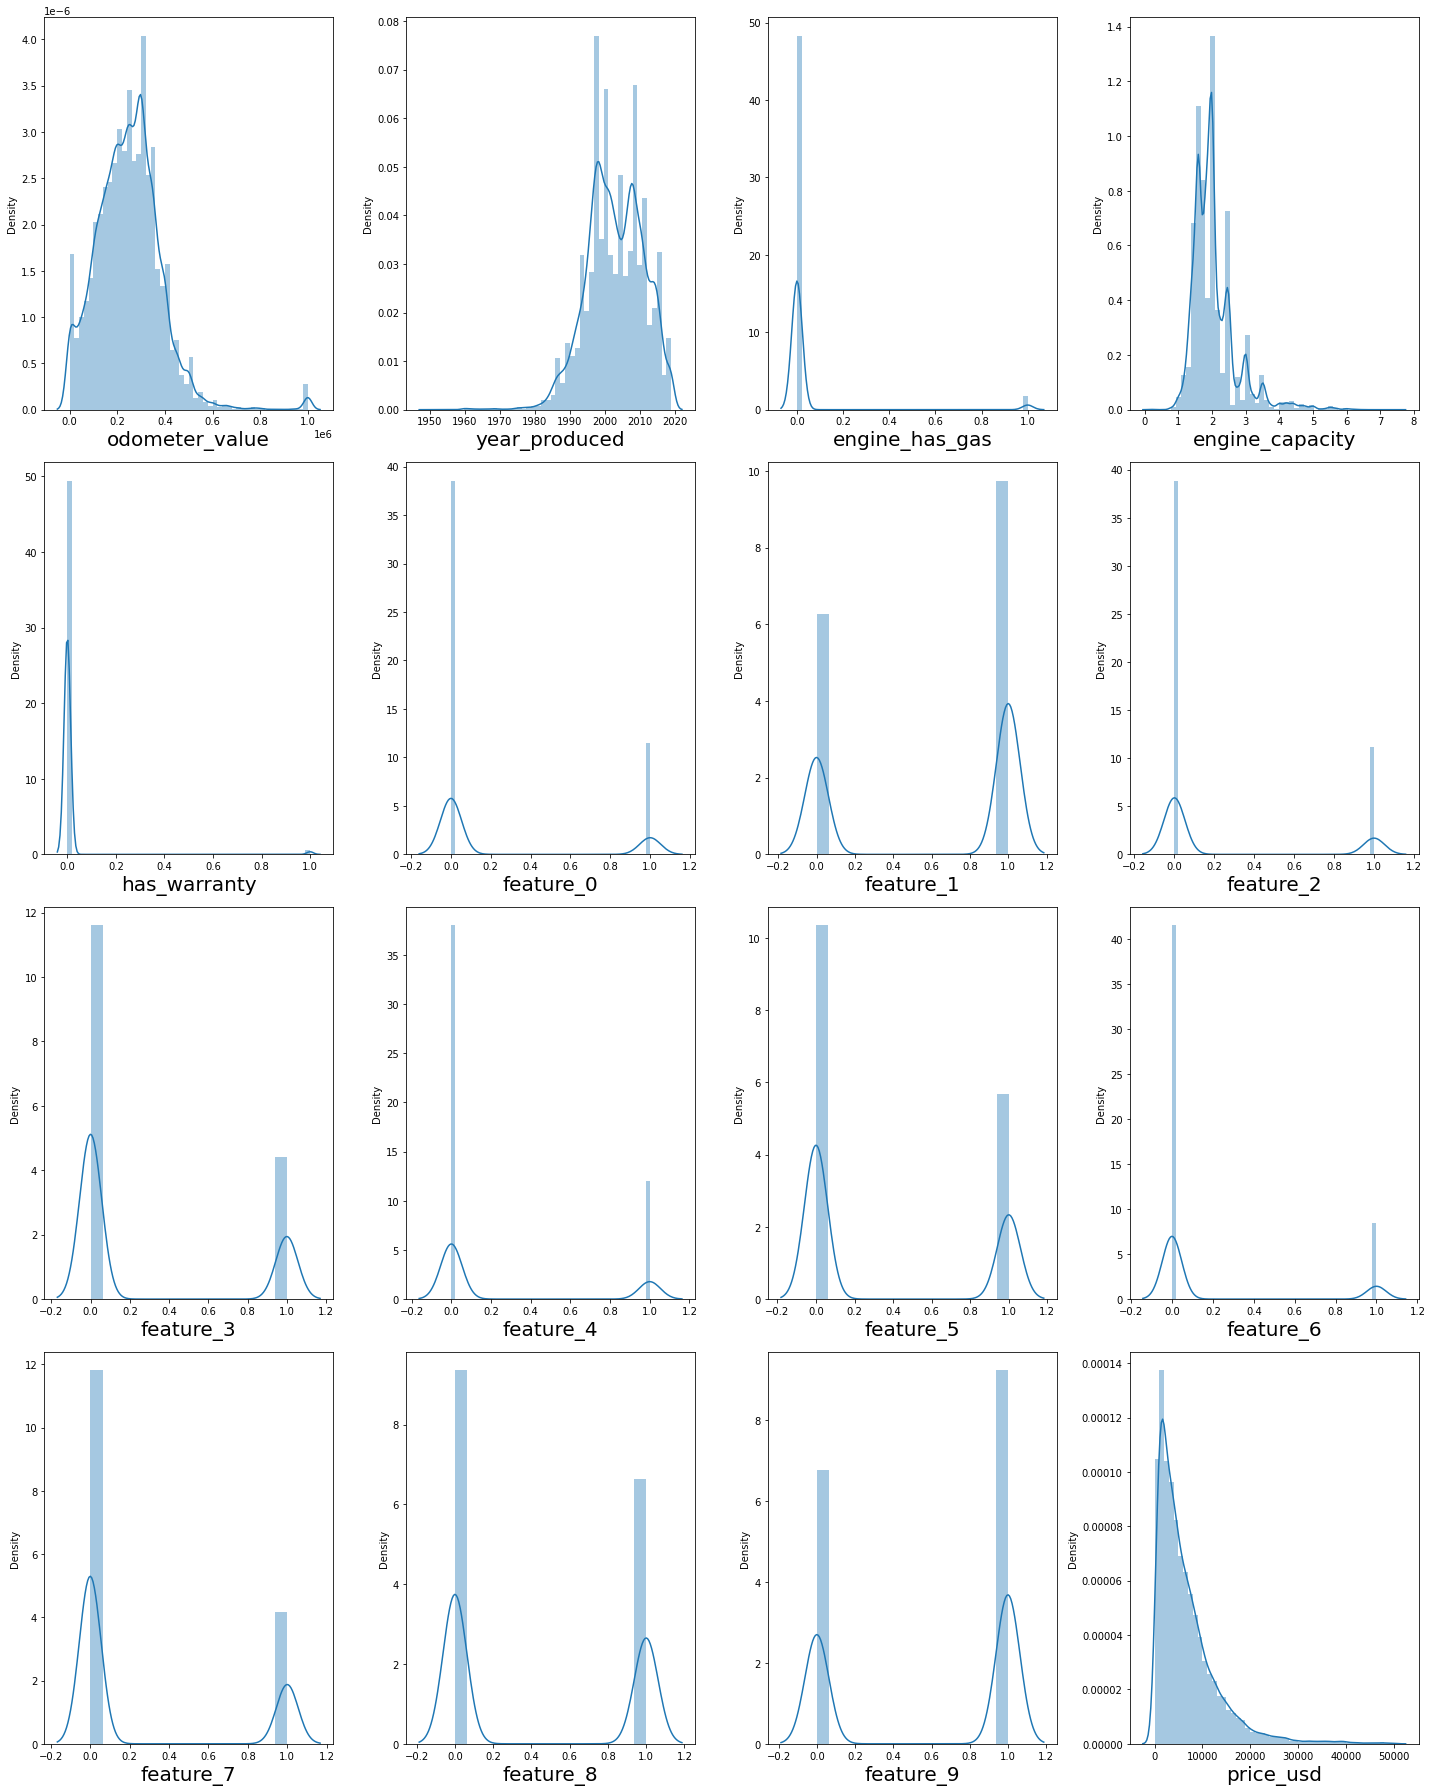

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_train.columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
# Check for outliers
Zscore = np.abs(stats.zscore(df_train))
print(np.where(Zscore >3))

(array([   33,    49,    60, ..., 30798, 30808, 30823]), array([ 3,  2, 20, ...,  1, 20, 15]))


In [15]:
# Obtain clean dataframe
clean_df_train = df_train[(Zscore <3).all(axis = 1)]
print("The shape of the clean dataframe is :", clean_df_train.shape)

The shape of the clean dataframe is : (27399, 25)


In [16]:
# Checking for colinearity
y = df_train['price_usd'].values
#X = clean_df_train.drop(columns = ['price_usd'])
y = y.reshape(len(y),1)
y.shape
scaler =StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,Features
0,1.505826,odometer_value
1,2.596178,year_produced
2,1.804840,engine_has_gas
3,1.906321,engine_capacity
4,3.323156,has_warranty
5,2.746678,feature_0
6,2.130635,feature_1
7,1.608954,feature_2
8,1.821120,feature_3
9,1.800804,feature_4


In [17]:
# Drop columns with high vif score
bad_features = vif[vif['VIF'] >  5]
colinear_cols = list(bad_features.Features.values)
df_train.drop(colinear_cols, axis = 1, inplace= True)
df_test.drop(colinear_cols, axis = 1, inplace= True)
X = df_train.drop(columns = ['price_usd'])
y = df_train['price_usd'].values
y = y.reshape(len(y),1)

In [18]:
# Scale the new X and y
sc =StandardScaler()
sc_y = StandardScaler()

X_scaled = sc.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

# Split data into train and validation set
x_train,x_valid,y_train,y_valid = train_test_split(X_scaled,y_scaled,test_size = 0.2,random_state=35)

In [19]:
# print X_train
print(x_train)

[[ 5.53333137 -1.73192784 -0.18963531 ... -0.27911559 -0.08395013
  -0.17868078]
 [-0.13850424 -0.24099552  5.2732795  ... -0.27911559 -0.08395013
  -0.17868078]
 [-0.0869421  -0.11675116 -0.18963531 ... -0.27911559 -0.08395013
  -0.44330964]
 ...
 [-0.42577903  1.49842551 -0.18963531 ... -0.55017996 -0.08395013
  -0.44330964]
 [-0.35948485  0.50447064 -0.18963531 ... -0.85940916 -0.08395013
  -0.44330964]
 [-1.34653157 -2.22890528 -0.18963531 ... -0.85940916 -2.40872722
  -0.44330964]]


In [20]:
print(y_train)

[[-0.92490599]
 [-0.56620969]
 [-0.3790638 ]
 ...
 [ 1.2584628 ]
 [-0.1061427 ]
 [-1.00288345]]


In [21]:
# Build linear regreesion model
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Check accuracy on train set
regression.score(x_train,y_train)

0.7646155148583772

In [23]:
# check adjusted r2 on train set
adj_r2(x_train,y_train)

0.764386188413488

In [24]:
# Check accuracy on validation set
regression.score(x_valid,y_valid)

0.7601067765181337

In [25]:
# check adjusted r2 on validation set
adj_r2(x_valid,y_valid)

0.7591690831364457

In [26]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = regression.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.24225406932554877


In [27]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(regression, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(regression, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())
#print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

[0.75402915 0.76588226 0.77195335]
0.7639549186910589
0.007443353679104164


## Lasso Regression

In [28]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [29]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

5.256673747899733e-06

In [30]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5.256673747899733e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
# Examine r2 score on train set
lasso_reg.score(x_train, y_train)

0.7646155140362334

In [32]:
# Examine r2 score on validation set
lasso_reg.score(x_valid, y_valid)

0.7601068092657204

In [33]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = lasso_reg.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.24225403625568542


In [34]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(lasso_reg, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(lasso_reg, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

[0.75402891 0.76588258 0.77195408]
0.7639551884069884
0.007443745484419563


### Ridge Regression

In [35]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.33507466, 9.24158767, 8.62318547, 0.48690296, 2.53642524,
       4.46135513, 1.04627889, 3.48475989, 7.40097526, 6.80514481,
       6.22384429, 7.10528403, 2.04923687, 3.41698115, 6.76242482,
       8.79234763, 5.43678054, 2.82699651, 0.30235258, 7.10336829,
       0.07884104, 3.7267907 , 5.30537215, 9.22111462, 0.89494545,
       4.05942322, 0.243132  , 3.42610984, 6.22231059, 2.79067948,
       2.0974995 , 1.15703233, 5.77140244, 6.95270006, 6.71957141,
       9.48861021, 0.02703214, 6.47196654, 6.00392237, 5.8873961 ,
       9.6277032 , 0.16871673, 6.96482431, 8.1367865 , 5.09807197,
       3.3396487 , 7.90840163, 0.97242926, 4.42035638, 5.19952375]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [36]:
ridgecv.alpha_

0.027032138935026984

In [37]:
# Now fit model with best alpha
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.027032138935026984, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [38]:
# Test model performance
ridge_model.score(x_valid, y_valid)

0.7601067858672983

In [39]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = ridge_model.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.2422540598843769


In [40]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(ridge_model, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(ridge_model, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

[0.75402915 0.76588223 0.77195339]
0.7639549224618029
0.007443364622064358


## Elastic net

In [41]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [42]:
# # l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
print(elasticCV.alpha_)
print(elasticCV.l1_ratio)

0.0015428897516320073
0.5


In [43]:
# Fit elastic net regressor
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0015428897516320073, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [44]:
# Examine r2s core
elasticnet_reg.score(x_valid, y_valid)

0.7601041276013413

In [45]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = elasticnet_reg.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.24225674431095676


In [46]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(elasticnet_reg, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(elasticnet_reg, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

[0.75399012 0.76589547 0.77206108]
0.7639822224223193
0.007500456431587416


## Polynomial Regression

In [47]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly_train = poly_reg.fit_transform(x_train)
X_poly_valid = poly_reg.transform(x_valid)
print(X_poly_train)


[[ 1.          5.53333137 -1.73192784 ...  0.00704762  0.01500027
   0.03192682]
 [ 1.         -0.13850424 -0.24099552 ...  0.00704762  0.01500027
   0.03192682]
 [ 1.         -0.0869421  -0.11675116 ...  0.00704762  0.0372159
   0.19652344]
 ...
 [ 1.         -0.42577903  1.49842551 ...  0.00704762  0.0372159
   0.19652344]
 [ 1.         -0.35948485  0.50447064 ...  0.00704762  0.0372159
   0.19652344]
 [ 1.         -1.34653157 -2.22890528 ...  5.80196682  1.06781199
   0.19652344]]


In [48]:
# Train polynomial regression model or order = 2
# doing the actual polynomial Regression
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Examine r2 score on train set
lin_reg_2.score(X_poly_train, y_train)

0.8819282085084448

In [50]:
# Examine r2 score on validation set
lin_reg_2.score(X_poly_valid, y_valid)

-1.3272365697765272e+16

In [51]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = lin_reg_2.predict(X_poly_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  1.3402982181793518e+16


## Support Vector Regression

In [52]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
# Examine r2 score on train set
regressor.score(x_train, y_train)

0.9105967211429553

In [54]:
# Examine r2 score on test set
regressor.score(x_valid, y_valid)

0.8854766205300444

In [55]:
# Let's create a function to create adjusted R-Squared
def adj_r2_new(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [56]:
# check adjusted r2 on validation set
adj_r2_new(x_valid,y_valid,regressor)

0.8850289721412368

In [57]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.11565043108276021


In [58]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(regressor, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(regressor, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.88024507 0.88504527 0.8836873 ]
0.8829925459794175
0.002020312620476722


## Decision Tree Regression

In [59]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [60]:
# Examine r2 score on train set
regressor.score(x_train, y_train)

0.999525975207098

In [61]:
# Examine r2 score on validtion set
regressor.score(x_valid, y_valid)

0.8563294654458531

In [62]:
# check adjusted r2 on validation set
adj_r2_new(x_valid,y_valid,regressor)

0.8557678868091594

In [63]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.14508443020088


In [64]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(regressor, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(regressor, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

[0.84077195 0.83470158 0.82249907]
0.8326575345290407
0.007598600861647807


## Random Forest Regression

In [65]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [66]:
# Examine r2 score on train set
regressor.score(x_train, y_train)

0.9838873651494843

In [67]:
# Examine r2 score on test set
regressor.score(x_valid, y_valid)

0.9154734608064039

In [68]:
# check adjusted r2 on validation set
adj_r2_new(x_valid,y_valid,regressor)

0.9151430639105331

In [69]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.08535838481991141


In [70]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(regressor, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(regressor, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

[0.90719103 0.90435839 0.90476579]
0.9054384029855256
0.0012504041149931982


## XGBoost Regression

In [71]:
# Training XGBoost on the Training set
import xgboost
from xgboost import XGBRegressor
regressor2 = XGBRegressor()
regressor2.fit(x_train, y_train)

[16:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [72]:
# Examine r2 score on train set
regressor2.score(x_train, y_train)

0.910243257321586

In [73]:
# Examine r2 score on test set
regressor2.score(x_valid, y_valid)

0.9040586672211857

In [74]:
# check adjusted r2 on validation set
adj_r2_new(x_valid,y_valid,regressor2)

0.9036836522396399

In [75]:
# MSE Metrics on validation set
from sklearn.metrics import mean_squared_error
y_pred = regressor2.predict(x_valid)
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The mean square error of the model is:  0.0968855140834828


In [76]:
# Applying cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
Rcross = cross_val_score(regressor2, x_train, y_train, cv = 3)
y_pred_cv = cross_val_predict(regressor2, x_train,y_train, cv = 3)
print(Rcross)
print(Rcross.mean())
print(Rcross.std())

[16:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.90196681 0.89902986 0.90171092]
0.9009025294083468
0.0013282913618474115


## CatBoost Regression

In [77]:
!pip install catboost


     |████████████████████████████████| 65.8MB 71kB/s 


In [78]:
# Training CatBoost model on the Training set
import catboost
from catboost import  CatBoostRegressor
regressor3 = CatBoostRegressor()
regressor3.fit(x_train, y_train)

Learning rate set to 0.069051
0:	learn: 0.9478121	total: 53.8ms	remaining: 53.7s
1:	learn: 0.8991392	total: 60.1ms	remaining: 30s
2:	learn: 0.8570120	total: 65.9ms	remaining: 21.9s
3:	learn: 0.8137146	total: 72ms	remaining: 17.9s
4:	learn: 0.7751705	total: 77.9ms	remaining: 15.5s
5:	learn: 0.7390637	total: 84ms	remaining: 13.9s
6:	learn: 0.7054582	total: 90ms	remaining: 12.8s
7:	learn: 0.6758248	total: 96.1ms	remaining: 11.9s
8:	learn: 0.6497555	total: 102ms	remaining: 11.2s
9:	learn: 0.6240847	total: 108ms	remaining: 10.7s
10:	learn: 0.5995690	total: 114ms	remaining: 10.2s
11:	learn: 0.5778296	total: 119ms	remaining: 9.82s
12:	learn: 0.5569423	total: 125ms	remaining: 9.51s
13:	learn: 0.5377145	total: 131ms	remaining: 9.24s
14:	learn: 0.5201174	total: 137ms	remaining: 9s
15:	learn: 0.5039983	total: 143ms	remaining: 8.8s
16:	learn: 0.4891155	total: 149ms	remaining: 8.63s
17:	learn: 0.4755200	total: 155ms	remaining: 8.47s
18:	learn: 0.4626531	total: 161ms	remaining: 8.32s
19:	learn: 0.45

In [79]:
# METRICS OF TRAINING SET
from sklearn.metrics import r2_score
y_hat = regressor3.predict(x_train)
r2_score(y_train,y_hat)

0.9606455128260516

In [80]:
# METRICS ON TEST SET
from sklearn.metrics import r2_score, mean_squared_error
y_pred = regressor3.predict(x_valid)
print("The r2 score of the model is: " , r2_score(y_valid,y_pred))
print("The mean square error of the model is: " , mean_squared_error(y_valid,y_pred))

The r2 score of the model is:  0.9353323443370148
The mean square error of the model is:  0.06530406532840528


In [81]:
# saving the best model to the local file system
filename = 'best_regression_model.pickle'
pickle.dump(regressor3, open(filename, 'wb'))

## # Conclusion: Best linear model achieved with CatBoost mODEL
* train set: r2_score:0.80 (previous model)/ 0.95 (current mode)
* validation set:  r2_score:     0.794 (previous model)/ 0.93 (current model)

### Make prediction on validation set with best model

In [83]:
# Make prediction on test set with 
best_model = regressor3
# Predicting a new result
y_hat = sc_y.inverse_transform(best_model.predict((x_valid)))
# Predicting the Test set results
np.set_printoptions(precision=2)
y_valid_true = sc_y.inverse_transform(y_valid)
print(np.concatenate((y_hat.reshape(len(y_hat),1), y_valid_true.reshape(len(y_valid_true),1)),1))

[[ 2959.33  3800.  ]
 [10319.33 10290.  ]
 [ 1181.52  1170.  ]
 ...
 [10860.17 10499.  ]
 [ 5048.31  4450.  ]
 [ 1825.49  1000.  ]]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


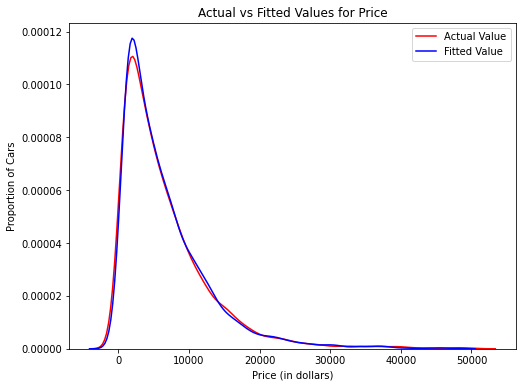

In [84]:
# Let's visualize the fit
plt.figure(figsize=(8, 6))


ax1 = sns.distplot(y_valid_true, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend(['Actual Value','Fitted Value'])

plt.show()
plt.close()

### Make prediction on test set with best model

In [85]:
# Make prediction
X_test = df_test.values
# load trained model
loaded_model = pickle.load(open('best_regression_model.pickle', 'rb'))
y_hat = sc_y.inverse_transform(loaded_model.predict(sc.transform(X_test)))

In [ ]:
# save file as txt file
np.savetxt('October2020_Challenge_AbiolaObembe', y_hat, fmt='%d', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

# numpy.savetxt(fname, arr, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

 # Save Numpy array to csv with custom header and footer
#np.savetxt('array_hf.csv', [arr], delimiter=',', fmt='%d' , header='A Sample 2D Numpy Array :: Header', footer='This is footer')